 ## Statistics_ChiSquare
 
    최초 작성일 : 2020/03/06
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - Chi-Square test
        
        - Fisher's exact test
        
        - Cochran-armitage trend test

## Chi-Square test

    다양한 그룹간의 비교
    2*2 형태일때 셀의 최소 기대도수는 5
    
    왜 20%? 기대도수는 프로그램마다 달라서 찾아봐야함..구글링합시다..ㅎ 
    https://sites.google.com/a/lakeheadu.ca/bweaver/Home/statistics/notes/chisqr_assumptions
    
    기대에 못미치는 셀이 몇%이상인가에 따라 부정확할수있다
    셀마다 개수가 중요함, 셀마다 최소 개수가 몇인지 알아야함
    
    이걸 만족시킬수 없다면 사용하는게 fisher's exact test 
        
    
## Fisher's exact test

    기대도수가 5보다 작은 셀이 전체 20% 이상일때 사용
    카이제곱이 갖는 기대도수에 못미치는 상태를 보완한게 Fisher's exact test
    
    
    ex)
    
    1       숙취(+)  숙취(-)
    --------------------------
    술(+)     30       70
    술(-)      5       95
    
    => 모든 값이 5 이상이므로 chi-square test 가능
    
    
    2       숙취(+)  숙취(-)
    --------------------------
    술(+)     30       70
    술(-)      4       96
    
    => 5보다 작은 값 존재하므로 chi-square 사용 불가
       fisher's exact 사용해야한다. 4가 있는 cell은 전체의 25% 차지
       
    
    3       숙취(+)  숙취(-)  숙취(+-)
    ------------------------------------
    술(+)     30       70       100
    술(-)      4       96      1000
    
    => 한 cell 안에 4가 있어도 chi-square 사용 가능
       100/6 = 17% 
       기대도수가 5보다 작은 셀이 전체 17%를 차지하기 때문
       
       
    4       숙취(+)  숙취(-)  숙취(+-)
    ------------------------------------
    술(+)      3       70       100
    술(-)      4       96      1000
    
    => 기대도수가 5보다 작은 셀이 2개 존재
       100/6 = 17%, 17% * 2 = 34%
       총 34% 차지하므로 chi-square 사용 못하고, fisher's exact 사용해야 함
       
       
## Cochran-Amitage trend test

    트렌드에 따른 비율 변화 차이
    
    ex)
    
          숙취(+)  숙취(-)
    ------------------------
    블랙    -        -
    골드    -        -
    블루    -        -
    
    => 의미를 가지고 있는 애들을 레이블에 두기!
       블랙 - 골드 - 블루 순(술의 종류)으로 가격이 비싸지고, 맛이 순해지는 트렌드가 있음
       이 순서에 따라 숙취 비율이 어떻게 변화하는지 알아볼때 Cochran-amitage trend test 사용

### 예시1. 자동차의 실린더 수와 변속기의 관계

In [3]:
# 데이터 준비

str(mtcars)
head(mtcars)

table(mtcars$cyl, mtcars$am)
# 실린더 cyl, 변속기 am(자동0, 수동1)
# 둘다 명목변수 -> 카이제곱 사용 (3*2 형태)
# 명목변수 : 단순히 서로 다른 속성으로 분류되는 것 / 속성들 사이의 서열을 정할 수 없다 ex) 성별, 종교, 출생지역, 인종
# cyl의 종류에 따라 자동0, 수동1 개수 보여줌 / 각각의 값 교차해서 빈도수 구해줌 

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


   
     0  1
  4  3  8
  6  4  3
  8 12  2

In [8]:
# 가독성을 위해 테이블 수정

## 컬럼 추가
mtcars$tm <- ifelse(mtcars$am == 0, "automatic", "manual")

## 테이블 확정
result <- table(mtcars$cyl, mtcars$tm)
result

## addmargins : 행과 열별로 각각의 합계를 보여줌
addmargins(result)

## 카이제곱
chisq.test(result)
# p-value = 0.01265   0.05보다 작은 값을 가지므로 대립가설. 실린더수 와 변속기 간의 차이가 있음
# 경고메시지 : 카이제곱 정확성은 불확실하다
# 셀 안에 기대도수 보다 작은 값들이 있기때문에 나타나는 경고문 

## 그럼 fisher's exact test 사용하기
fisher.test(result)
# p-value = 0.009105   0.05보다 작은 값을 가지므로 대립가설. 실린더수 와 변속기 간의 차이가 있음

   
    automatic manual
  4         3      8
  6         4      3
  8        12      2

,automatic,manual,Sum
4,3,8,11
6,4,3,7
8,12,2,14
Sum,19,13,32


Warning message in chisq.test(result):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  result
X-squared = 8.7407, df = 2, p-value = 0.01265



	Fisher's Exact Test for Count Data

data:  result
p-value = 0.009105
alternative hypothesis: two.sided


### 예시2. 시군구에 따른 다자녀 조례 채택여부

    시군구에 따라 다자녀 조례 채택여부가 연관이 있는가? 
    시군구 = 명목변수, 다자녀 = 명목변수 
    
    귀무가설 : 시군구에 따라 다자녀 조례 채택여부 연관 없다
    대립가설 : 시군구에 따라 다자녀 조례 채택여부 연관 있다

In [31]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/anova_two_way.csv")
str(mydata) # 5개의 변수 226개 데이터
head(mydata)

# 시군구에 따른 채택 여부 개수 알아보기
result2 <- table(mydata$ad_layer, mydata$multichild)
result2

# 카이제곱
chisq.test(result2)
# p-value = 0.7133  0.05보다 크므로 귀무가설 / 시군구에 따라 다자녀 조례 채택여부 연관 없음
# but 경고가 뜨는 것으로 보아 셀 안에 기대도수 값을 못 미치는게 있을것 

# 그러므로 fisher 사용하자
fisher.test(result2)
# p-value = 0.7125  0.05보다 크므로 귀무가설 / 시군구에 따라 다자녀 조례 채택여부 연관 없음

'data.frame':	226 obs. of  5 variables:
 $ cities    : chr  "경기 수원시" "경기 성남시" "경기 의정부시" "경기 안양시" ...
 $ birth_rate: num  1.29 1.16 1.1 1.18 1.07 ...
 $ ad_layer  : chr  "자치시" "자치시" "자치시" "자치시" ...
 $ multichild: chr  "NO" "NO" "NO" "NO" ...
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...


cities,birth_rate,ad_layer,multichild,ID
경기 수원시,1.292,자치시,NO,1
경기 성남시,1.159,자치시,NO,2
경기 의정부시,1.104,자치시,NO,3
경기 안양시,1.177,자치시,NO,4
경기 부천시,1.072,자치시,NO,5
경기 광명시,1.235,자치시,NO,6


        
         NO YES
  자치구 64   5
  자치군 78   4
  자치시 69   6

Warning message in chisq.test(result2):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  result2
X-squared = 0.67562, df = 2, p-value = 0.7133



	Fisher's Exact Test for Count Data

data:  result2
p-value = 0.7125
alternative hypothesis: two.sided


### 예시3. 흡연여부와 고혈압의 관계
    흡연자, 비흡연자, 과거흡연자(Ex-smoker)와 고혈압(HBP)의 유무가 서로 연관이 있을까?
    흡연 유무도 레벨이 있다(=트랜드가 있다)
    흡연자 안좋음, 과거흡연자 중간, 비흡연자 좋음
    
    귀무가설 : 흡연 유무에 따라 고혈압 관계가 있다
    대립가설 : 흡연 유무에 따라 고혈압 관계가 없다

In [12]:
# 데이터 준비
library(moonBook)

str(acs)
head(acs)

table(acs$smoking, acs$HBP)
# 흡연유무에 따른 고혈압 여부 # 결과값이 우리가 예측하는 것과는 다를 것 -> 교란변수 인지해야함 

'data.frame':	857 obs. of  17 variables:
 $ age             : int  62 78 76 89 56 73 58 62 59 71 ...
 $ sex             : chr  "Male" "Female" "Female" "Female" ...
 $ cardiogenicShock: chr  "No" "No" "Yes" "No" ...
 $ entry           : chr  "Femoral" "Femoral" "Femoral" "Femoral" ...
 $ Dx              : chr  "STEMI" "STEMI" "STEMI" "STEMI" ...
 $ EF              : num  18 18.4 20 21.8 21.8 22 24.7 26.6 28.5 31.1 ...
 $ height          : num  168 148 NA 165 162 153 167 160 152 168 ...
 $ weight          : num  72 48 NA 50 64 59 78 50 67 60 ...
 $ BMI             : num  25.5 21.9 NA 18.4 24.4 ...
 $ obesity         : chr  "Yes" "No" "No" "No" ...
 $ TC              : num  215 NA NA 121 195 184 161 136 239 169 ...
 $ LDLC            : int  154 NA NA 73 151 112 91 88 161 88 ...
 $ HDLC            : int  35 NA NA 20 36 38 34 33 34 54 ...
 $ TG              : int  155 166 NA 89 63 137 196 30 118 141 ...
 $ DM              : chr  "Yes" "No" "No" "No" ...
 $ HBP             : chr  "No" "Yes"

age,sex,cardiogenicShock,entry,Dx,EF,height,weight,BMI,obesity,TC,LDLC,HDLC,TG,DM,HBP,smoking
62,Male,No,Femoral,STEMI,18.0,168,72,25.51020,Yes,215,154,35,155,Yes,No,Smoker
78,Female,No,Femoral,STEMI,18.4,148,48,21.91381,No,NA,NA,NA,166,No,Yes,Never
76,Female,Yes,Femoral,STEMI,20.0,NA,NA,NA,No,NA,NA,NA,NA,No,Yes,Never
89,Female,No,Femoral,STEMI,21.8,165,50,18.36547,No,121,73,20,89,No,No,Never
56,Male,No,Radial,NSTEMI,21.8,162,64,24.38653,No,195,151,36,63,Yes,Yes,Smoker
73,Female,No,Radial,Unstable Angina,22.0,153,59,25.20398,Yes,184,112,38,137,Yes,Yes,Never


           
             No Yes
  Ex-smoker  81 123
  Never      99 233
  Smoker    176 145

In [18]:
# 컬럼의 순서 바꾸기 (트랜드 순으로)
acs$smoking <- factor(acs$smoking, levels = c("Never", "Ex-smoker", "Smoker")) 
                                 # levels : 컬럼 순서 지정 

# 테이블 확정
result <- table(acs$HBP, acs$smoking)
result

# HBP Yes에 해당하는 값 뽑아내기(x)
result[2, ]

# 각 열의 합계 뽑아내기(n)
colSums(result)

# Cochran-Amitage trend test : prop.trend.test()
prop.trend.test(x=result[2,], n=colSums(result))
#  p-value = 9.282e-11 
# 0.05보다 낮으므로 흡연 유무 레벨에 따른 고혈압 관계는 매우 낮음을 알수있음.....
# 상식으로도 안맞는것 같으니.. 교란변수 찾아보자...

# 교란변수 찾기
# 나이와 흠연 연부 보기
mytable(smoking ~ age, data=acs)
# 비흠연자일수록 연령대 평균이 높다는 것을 알 수 있다 smoker들이 대체적으로 젊다
# 연령이 높을수록 HBP는 높아진다
# 그러므로 나이 변수가 교란변수임을 확인!!

     
      Never Ex-smoker Smoker
  No     99        81    176
  Yes   233       123    145

Never Ex-smoker    Smoker 
      233       123       145

Never Ex-smoker    Smoker 
      332       204       321


	Chi-squared Test for Trend in Proportions

data:  result[2, ] out of colSums(result) ,
 using scores: 1 2 3
X-squared = 41.967, df = 1, p-value = 9.282e-11



     Descriptive Statistics by 'smoking'     
______________________________________________ 
        Never     Ex-smoker    Smoker      p  
       (N=332)     (N=204)     (N=321)  
---------------------------------------------- 
 age 66.5 ± 10.7 65.7 ± 11.5 58.5 ± 11.3 0.000
---------------------------------------------- 

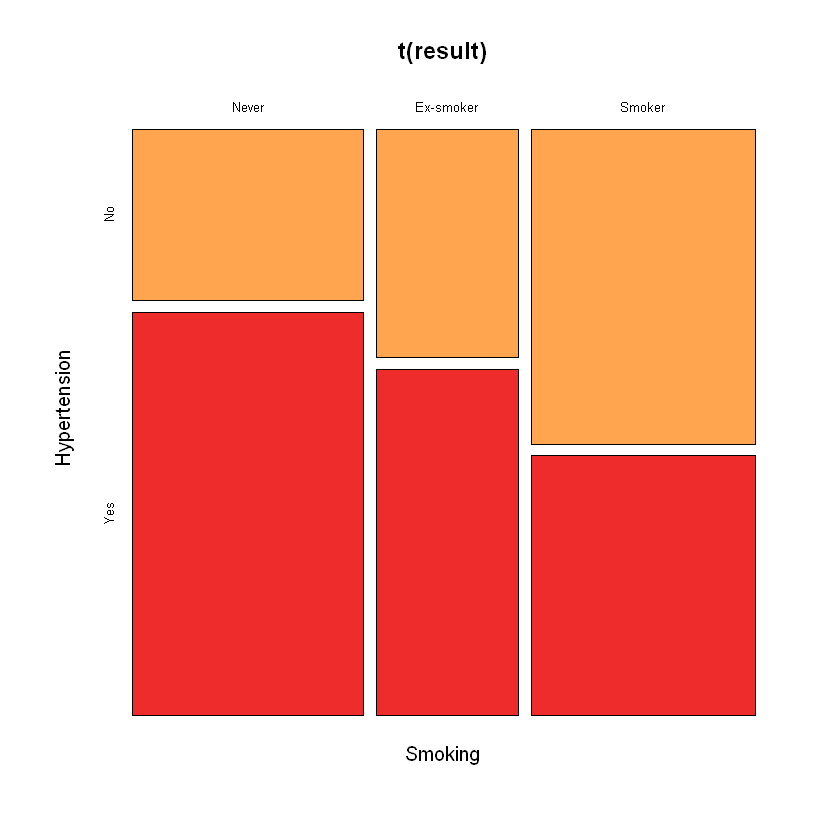

In [27]:
# 시각화

## 모자이크 그래프
# mosaicplot(result)
# mosaicplot(result, color=c("tan1", "firebrick2"))

## 그래프에 넣어줄 색상 확인(Rstudio에서 해보자)
# colors() # 색상 이름 확인 # 밑에 console칸에서 enter 치면 계속 바뀜
# demo("colors")  # 색상 표까지(뭔색인지)확인 # 밑에 Console칸에서 enter치면 계속 바뀜

## 그래프 행열 위치 변경
# t(result) # t : 행과 열의 위치 바꾸기
# mosaicplot(t(result), color=c("tan1", "firebrick2"))

## 타이틀
mosaicplot(t(result), color=c("tan1", "firebrick2"), ylab="Hypertension", xlab="Smoking")